# ACTIVITY #1

In [1]:
import pandas as pd
df=pd.read_csv("Data Set/Telco Customer Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
binary_cols=['Partner','Dependents','PhoneService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0, 'No internet service':0})


In [6]:
multi_cols=['gender','MultipleLines','InternetService','Contract','PaymentMethod']

df=pd.get_dummies(df, columns=multi_cols,drop_first=True)

In [7]:
df.isnull().sum()

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges']=df['TotalCharges'].fillna(0)


In [9]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)



In [11]:
scaler=StandardScaler()

x_train_scaled=pd.DataFrame(scaler.fit_transform(X_train) , columns=X_train.columns)
x_test_scaled=pd.DataFrame(scaler.transform(X_test) , columns=X_test.columns)

In [12]:
from sklearn.linear_model import LogisticRegression

logistc_reg=LogisticRegression(max_iter=1000)

logistc_reg.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred=logistc_reg.predict(x_test_scaled)

In [14]:
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print("CLassification Report:\n",classification_report(y_test,y_pred))

CLassification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [16]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[934, 102],
       [151, 222]])

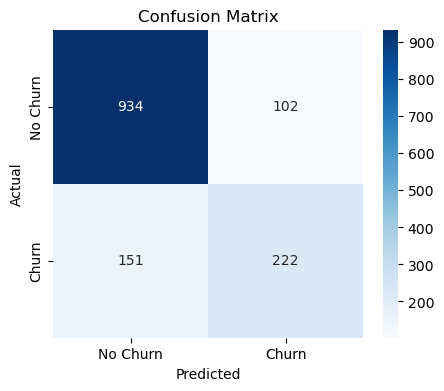

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Churn','Churn'],
            yticklabels=['No Churn','Churn'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
data_new=pd.DataFrame([{
     'SeniorCitizen': 0,
    'Partner': 0,
    'Dependents': 0,
    'tenure': 0,
    'PhoneService': 0,
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'PaperlessBilling': 0,
    'MonthlyCharges': 0.0,
    'TotalCharges': 0.0,
    'gender_Male': 0,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_Fiber optic': 0,
    'InternetService_No': 0,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 0,
    'PaymentMethod_Mailed check': 0


    
}])

data_new.at[0, 'SeniorCitizen'] = 1
data_new.at[0, 'Partner'] = 1
data_new.at[0, 'tenure'] = 15
data_new.at[0, 'MonthlyCharges'] = 70.35
data_new.at[0, 'TotalCharges'] = 1055.25
data_new.at[0, 'InternetService_Fiber optic'] = 1
data_new.at[0, 'Contract_One year'] = 1
data_new.at[0, 'PaymentMethod_Electronic check'] = 1


data_new_scaled=scaler.fit_transform(data_new)

try:
    predictions=logistc_reg.predict(data_new_scaled)
    if predictions==1:
        print("Customer will churn")
    else:
        print("Customer will not churn")
except Exception as e:
    print(e)

Customer will not churn


E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ACTIVITY # 2

In [26]:
df2=pd.read_csv("Data Set/Car Price Prediction.csv")
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
df2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [36]:
X=df2[['horsepower','enginesize','citympg']]
y=df2['price']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [44]:
y_pred_lr=lr.predict(X)

In [45]:
y_pred_lr[:5]

array([14457.35933922, 14457.35933922, 19241.89060693, 11143.2802727 ,
       15722.66489154])

In [48]:
print("Linear Regression R2: ",r2_score(y,y_pred_lr)*100)
print("Linear Regression Mean Squared error: ",np.sqrt(mean_squared_error(y,y_pred_lr)))

Linear Regression R2:  79.6783350787116
Linear Regression Mean Squared error:  3592.544777190557


# By Using PolyNomial Features


Polynomial Regression (degree=2)
R2: 0.8278710544945496
RMSE: 3306.3551476137454


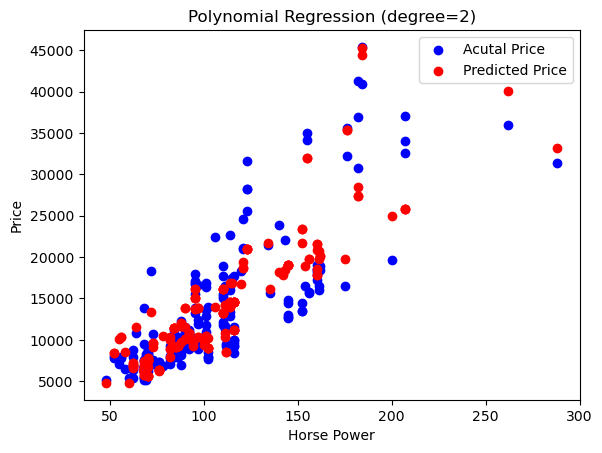


Polynomial Regression (degree=3)
R2: 0.8697273820313403
RMSE: 2876.3989213264754


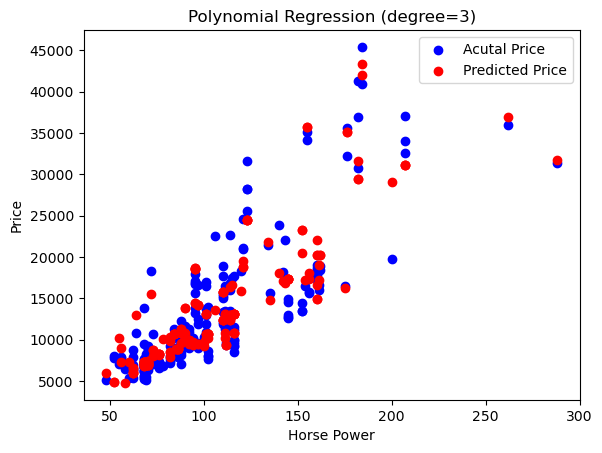


Polynomial Regression (degree=4)
R2: 0.9140078882920972
RMSE: 2336.963093327796


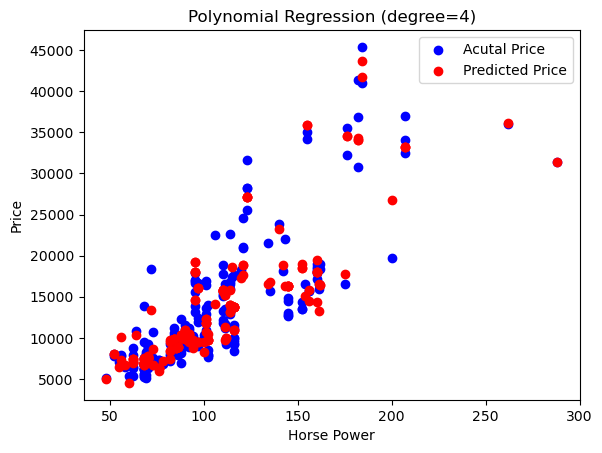

In [52]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

for degree in [2,3,4]:
    poly=PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X)

    poly_reg=LinearRegression()
    poly_reg.fit(X_poly,y)

    y_pred_poly=poly_reg.predict(X_poly)
    print(f"\nPolynomial Regression (degree={degree})")
    print("R2:", r2_score(y, y_pred_poly))
    print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_poly)))

    plt.scatter(df2['horsepower'],y, color='blue', label='Acutal Price')
    plt.scatter(df2['horsepower'],y_pred_poly, color='red', label='Predicted Price')
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.xlabel("Horse Power")
    plt.ylabel("Price")
    plt.legend()
    plt.show()


    
